<a href="https://colab.research.google.com/github/AdharshReddyC/LoanTap_Logistic_regression/blob/main/LoanTap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries for Data Analysis and Modeling
This section imports necessary libraries for data manipulation, visualization, statistical analysis, and machine learning modeling.


In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.utils.class_weight import compute_class_weight


In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Loading the Dataset
This section reads the loan data from a CSV file and stores it in a DataFrame for further analysis.


In [3]:
df=pd.read_csv('/content/loan_tap.csv')
data=df

## Displaying the Dataset
This code configures Pandas to show all columns in the DataFrame and displays the first few rows of the dataset for an overview.


In [4]:
pd.set_option('display.max_columns', None)
df.head()


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


## Check the shape of the dataset
df.shape  # Shape of the dataset


In [5]:
df.shape # Shape of the dataset

(396030, 27)

**Output Explanation:** The dataset contains 396,030 rows and 27 columns, indicating the number of records and features available for analysis.


In [6]:
# Statistical summary of the dataset -
df.describe(include='all')

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
count,396030.000000,396030,396030.000000,396030.000000,396030,396030,373103,377729,396030,3.960300e+05,396030,396030,396030,396030,394274,396030.000000,396030,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,396030,396030,358235.000000,395495.000000,396030
unique,NaN,2,NaN,NaN,7,35,173105,11,6,NaN,3,115,2,14,48816,NaN,684,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,393700
top,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,NaN,Oct-2000,NaN,NaN,NaN,NaN,NaN,f,INDIVIDUAL,NaN,NaN,USCGC Smith\r\nFPO AE 70466
freq,NaN,302005,NaN,NaN,116018,26655,4389,126041,198348,NaN,139563,14846,318357,234507,152472,NaN,3017,NaN,NaN,NaN,NaN,NaN,238066,395319,NaN,NaN,8
mean,14113.888089,NaN,13.639400,431.849698,NaN,NaN,NaN,NaN,NaN,7.420318e+04,NaN,NaN,NaN,NaN,NaN,17.379514,NaN,11.311153,0.178191,1.584454e+04,53.791749,25.414744,NaN,NaN,1.813991,0.121648,NaN
std,8357.441341,NaN,4.472157,250.727790,NaN,NaN,NaN,NaN,NaN,6.163762e+04,NaN,NaN,NaN,NaN,NaN,18.019092,NaN,5.137649,0.530671,2.059184e+04,24.452193,11.886991,NaN,NaN,2.147930,0.356174,NaN
min,500.000000,NaN,5.320000,16.080000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000e+00,0.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN
25%,8000.000000,NaN,10.490000,250.330000,NaN,NaN,NaN,NaN,NaN,4.500000e+04,NaN,NaN,NaN,NaN,NaN,11.280000,NaN,8.000000,0.000000,6.025000e+03,35.800000,17.000000,NaN,NaN,0.000000,0.000000,NaN
50%,12000.000000,NaN,13.330000,375.430000,NaN,NaN,NaN,NaN,NaN,6.400000e+04,NaN,NaN,NaN,NaN,NaN,16.910000,NaN,10.000000,0.000000,1.118100e+04,54.800000,24.000000,NaN,NaN,1.000000,0.000000,NaN
75%,20000.000000,NaN,16.490000,567.300000,NaN,NaN,NaN,NaN,NaN,9.000000e+04,NaN,NaN,NaN,NaN,NaN,22.980000,NaN,14.000000,0.000000,1.962000e+04,72.900000,32.000000,NaN,NaN,3.000000,0.000000,NaN


In [7]:
# Checking the structure and essential details of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

## Convert 'issue_d' and 'earliest_cr_line' Columns to Datetime
- This section converts the 'issue_d' and 'earliest_cr_line' columns from string format to datetime objects
- to enable date-based operations and analyses.


In [8]:
# Convert 'issue_d' and 'earliest_cr_line' columns to datetime
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y')

# Check the data types to confirm the conversion
print(df[['issue_d', 'earliest_cr_line']].dtypes)


issue_d             datetime64[ns]
earliest_cr_line    datetime64[ns]
dtype: object


## Convert 'title' and 'purpose' Columns to Lowercase
This section converts the text in the 'title' and 'purpose' columns to lowercase to standardize the data, ensuring uniformity for subsequent analysis and processing.


In [9]:
df['title'] = df.title.str.lower()
df['purpose'] = df.title.str.lower()


## Check for Missing Values in the DataFrame
This section checks the DataFrame for any missing values by calculating the sum of null entries in each column. It filters the results to display only the columns that contain missing values, allowing for a focused review of data completeness.


In [10]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

# Filter to show only columns with missing values
missing_values = missing_values[missing_values > 0]

# Display the missing values
print(missing_values)


emp_title               22927
emp_length              18301
purpose                  1756
title                    1756
revol_util                276
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64


## Fill Missing Values for Specified Columns

In [11]:
# Fill missing values for specified columns
df['emp_title'].fillna('Unknown', inplace=True)  # Replace missing emp_title with 'Unknown'
df['title'].fillna('Unknown', inplace=True)        # Replace missing title with 'Unknown'
df['revol_util'].fillna(df['revol_util'].median(), inplace=True)  # Replace missing revol_util with the median
df['pub_rec_bankruptcies'].fillna(0, inplace=True)  # Replace missing pub_rec_bankruptcies with 0
df['emp_length'].fillna(df['emp_length'].mode()[0], inplace=True)  # Replace missing emp_length with the mode
df['purpose'].fillna('Unknown', inplace=True)   # Replace missing purpose with 'Unknown'

In [12]:
# Impute missing mort_acc based on the median mort_acc grouped by total_acc
df['mort_acc'] = df.groupby('total_acc')['mort_acc'].transform(lambda x: x.fillna(x.median()))


## Create Box Plots for Numerical Columns
This section generates box plots for each numerical column in the DataFrame to visualize the distribution and identify potential outliers.


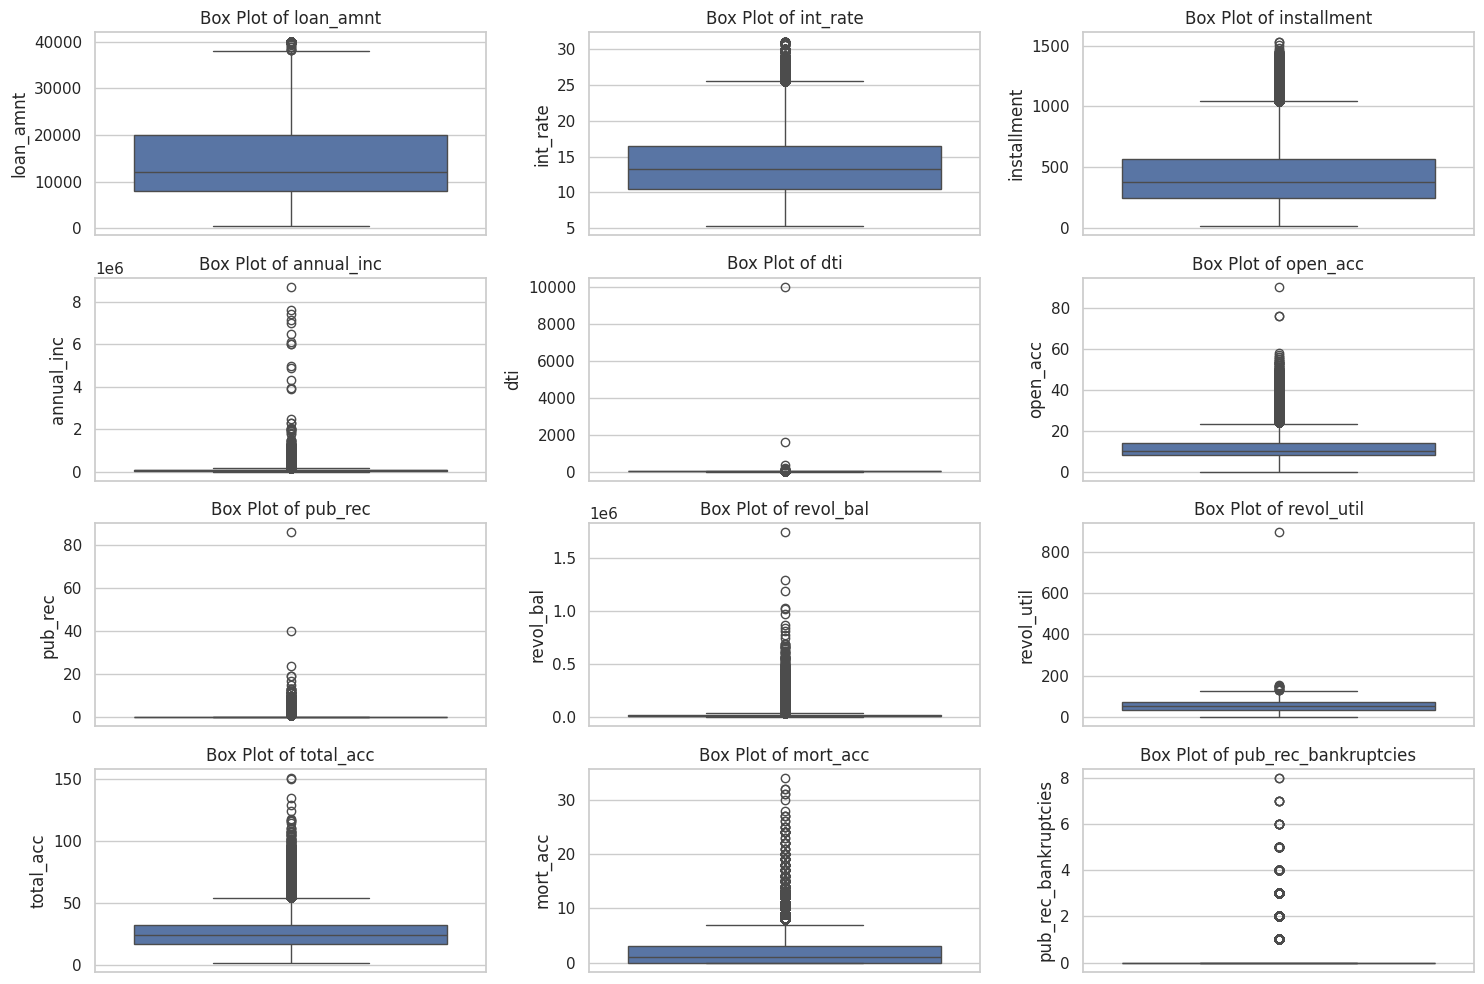

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int']).columns

# Create box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)  # Adjust the layout according to the number of plots
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()

plt.show()


# Observations on Box Plots
Most box plots indicate the presence of outliers in the numerical columns.
Outliers may affect the performance of machine learning models, so further investigation and potential treatment of these outliers may be necessary.


## Capping Outliers
This section caps outliers in numerical columns (excluding 'pub_rec_bankruptcies', 'pub_rec', and 'mort_acc').
Outliers are defined as values beyond three standard deviations from the mean.


In [14]:
for col in numerical_cols:
    if col not in ['pub_rec_bankruptcies', 'pub_rec', 'mort_acc']:

      mean = df[col].mean()
      std = df[col].std()

      # Calculate upper and lower limits
      upper_limit = mean + 3 * std
      lower_limit = mean - 3 * std

      # Cap the outliers
      df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
      df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])

# Histograms and Summary Statistics
This section generates histograms with Kernel Density Estimates (KDE) for each numerical variable to visualize their distributions.
It also displays summary statistics, including count, mean, standard deviation, min, and max values.


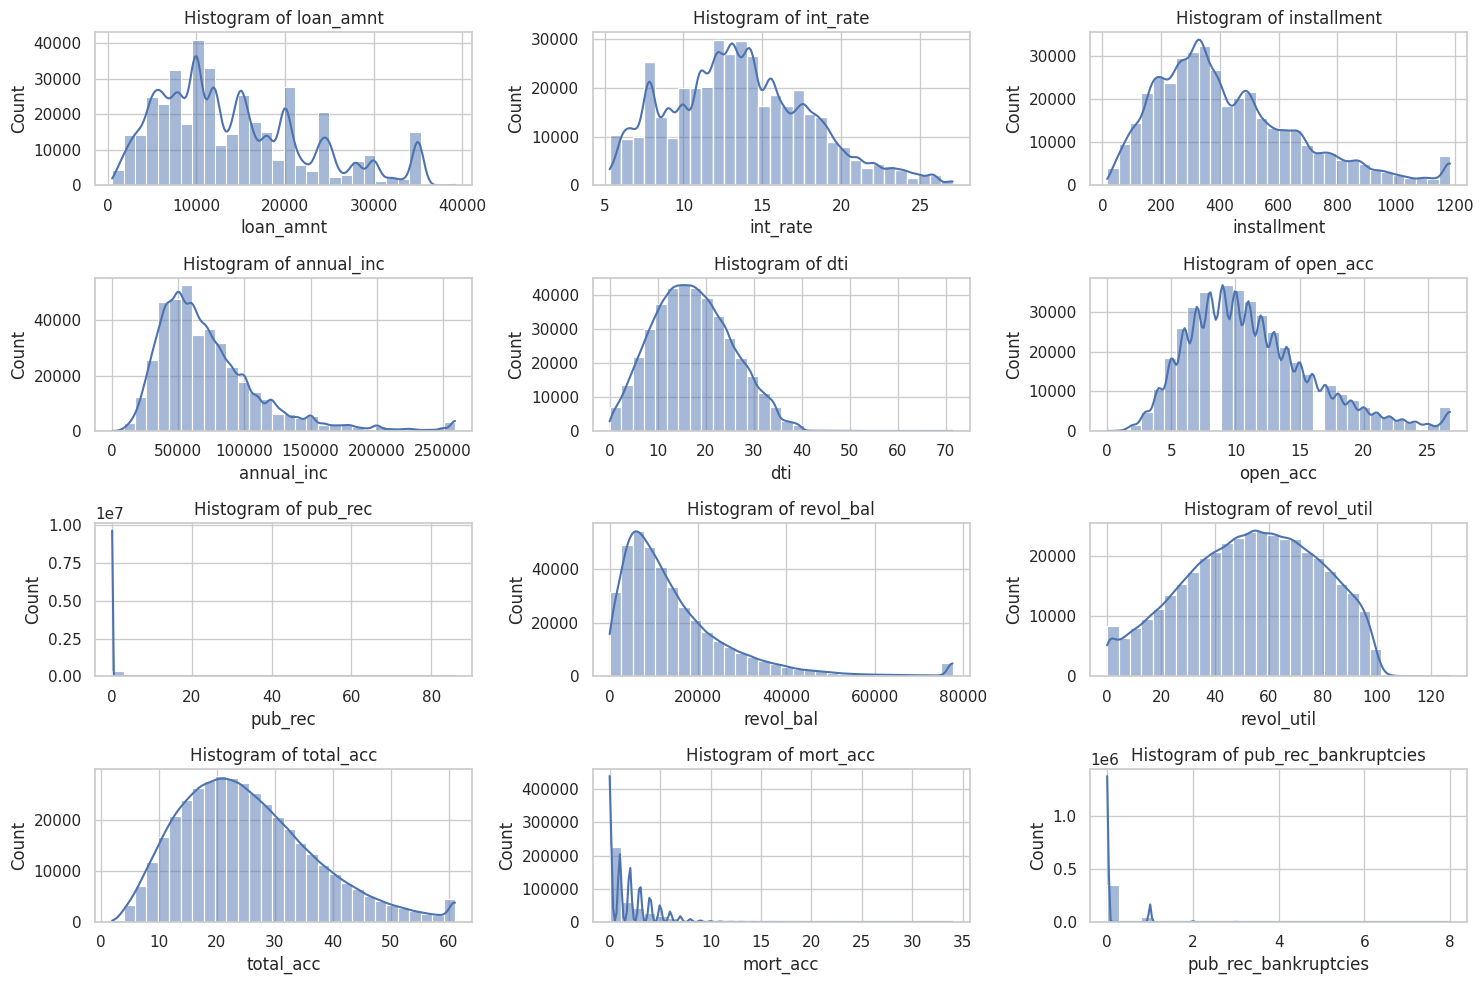

           loan_amnt       int_rate    installment     annual_inc  \
count  396030.000000  396030.000000  396030.000000  396030.000000   
mean    14113.514315      13.637128     431.094297   72979.311500   
std      8356.301829       4.464854     248.303949   40824.424441   
min       500.000000       5.320000      16.080000       0.000000   
25%      8000.000000      10.490000     250.330000   45000.000000   
50%     12000.000000      13.330000     375.430000   64000.000000   
75%     20000.000000      16.490000     567.300000   90000.000000   
max     39186.212113      27.055872    1184.033067  259116.039272   

                 dti       open_acc        pub_rec      revol_bal  \
count  396030.000000  396030.000000  396030.000000  396030.000000   
mean       17.348712      11.259447       0.178191   15093.672709   
std         8.130779       4.931900       0.530671   13713.161450   
min         0.000000       0.000000       0.000000       0.000000   
25%        11.280000       8.0000

In [15]:
# Histograms for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.tight_layout()

plt.show()

# Summary statistics for numerical variables
print(df[numerical_cols].describe())


# Summary of Distribution and Statistics
Most plots exhibit a normal distribution.
The summary statistics provide insights into each numerical variable, showing key metrics such as count, mean, standard deviation, and the min-max range for each feature.


## Count Plots for Categorical Variables
This section displays count plots for categorical variables including 'grade', 'home_ownership', and 'verification_status', with loan status as the hue.
These visualizations help in understanding the distribution of loan status across different categories.


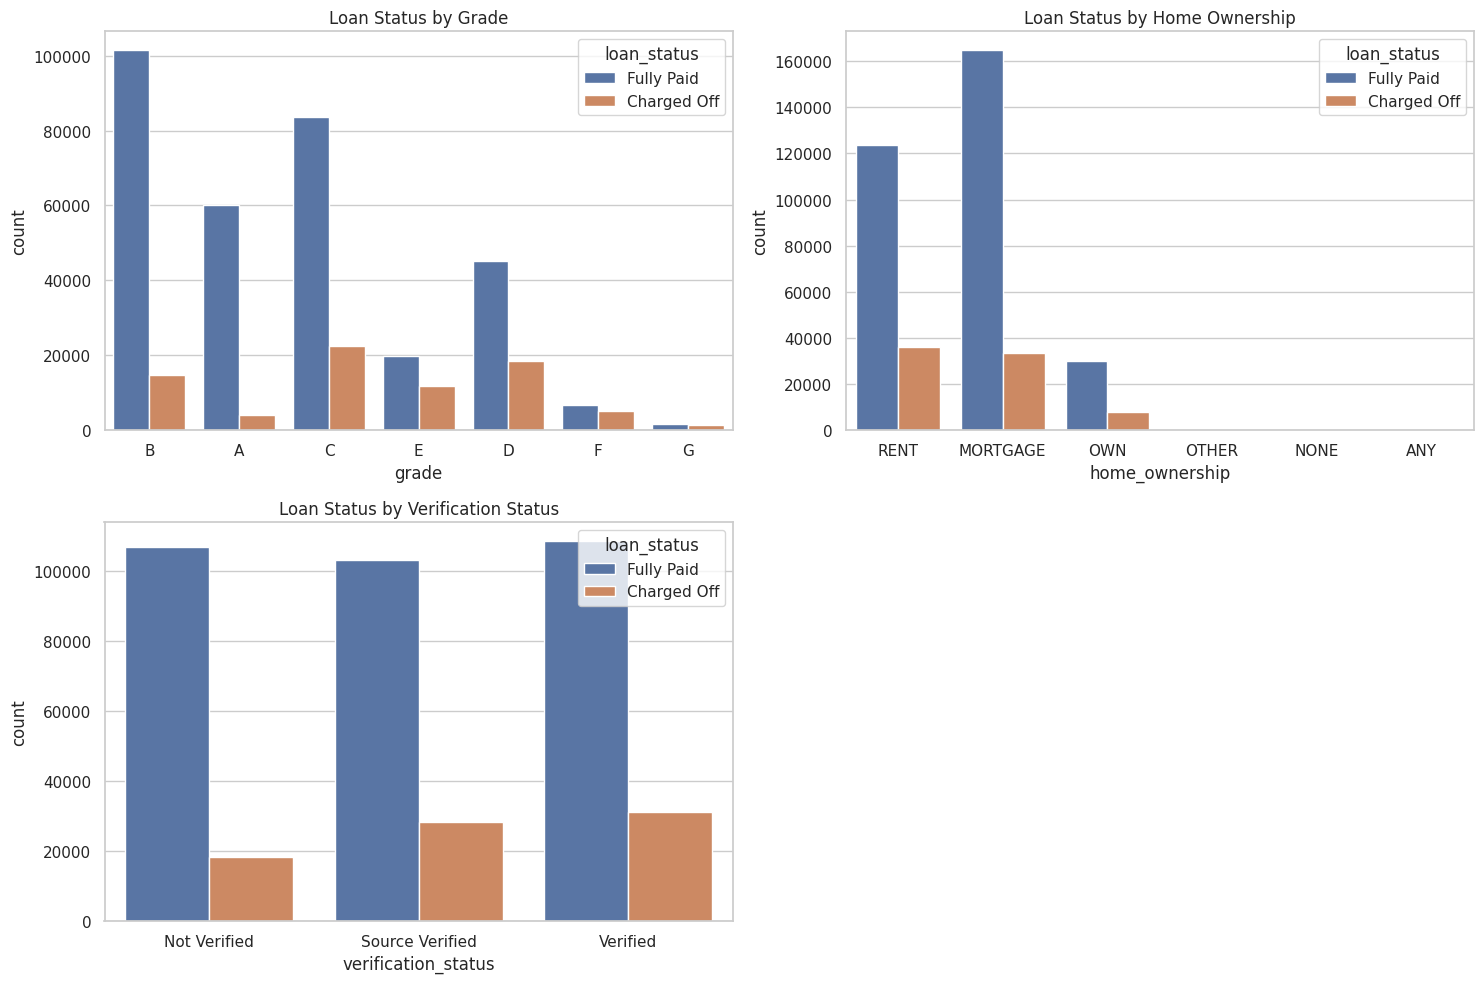

In [16]:

sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Count plot for 'grade'
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='grade', hue='loan_status')
plt.title("Loan Status by Grade")

# Count plot for 'home_ownership'
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='home_ownership', hue='loan_status')
plt.title("Loan Status by Home Ownership")



# Count plot for 'verification_status'
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='verification_status', hue='loan_status')
plt.title("Loan Status by Verification Status")

plt.tight_layout()
plt.show()


# Observations from Count Plots
1. Grades F, G, and E exhibit the worst charged off to paid loan ratios, while grades B, C, and A have the highest counts.
2. The top three home ownership statuses are mortgage, rent, and own.
3. There is no significant difference in loan status based on verification status, indicating it may not be a strong predictor of loan outcomes.


# KDE Plot for Annual Income Distribution by Loan Status
This section visualizes the distribution of annual income categorized by loan status using a Kernel Density Estimate (KDE) plot. The x-axis is limited to the 95th percentile to mitigate the effect of extreme values, providing a clearer view of the income distribution for different loan statuses.


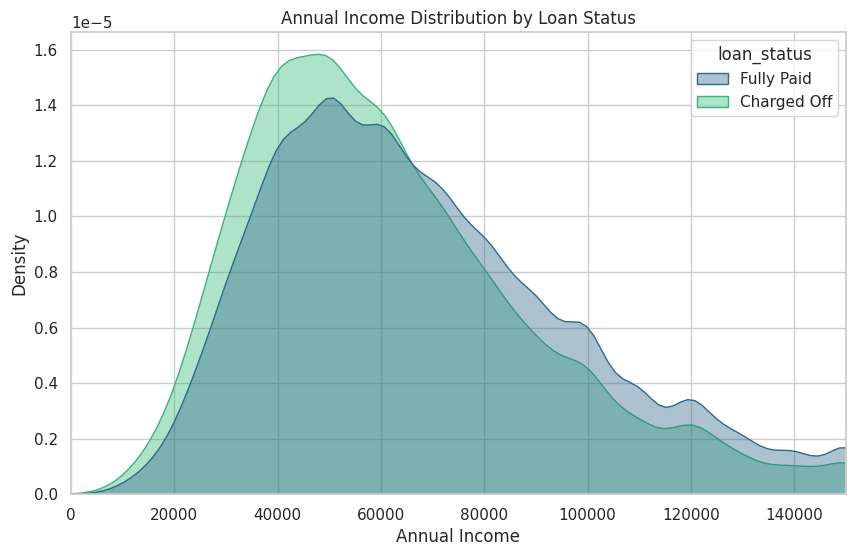

In [17]:
# Set the aesthetics for the plot
sns.set(style="whitegrid")

# KDE Plot for annual income by loan status
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="annual_inc", hue="loan_status", fill=True, common_norm=False, palette="viridis", alpha=0.4)
plt.title("Annual Income Distribution by Loan Status")
plt.xlabel("Annual Income")
plt.ylabel("Density")
plt.xlim(0, df['annual_inc'].quantile(0.95))  # Limit x-axis to 95th percentile to reduce skew from extreme values
plt.show()

# Scatter Plot of Annual Income vs. Loan Amount by Loan Status
This section illustrates the relationship between annual income and loan amount, categorized by loan status. The hue represents different loan statuses, providing insight into how loan amounts vary with income levels across various loan outcomes.


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


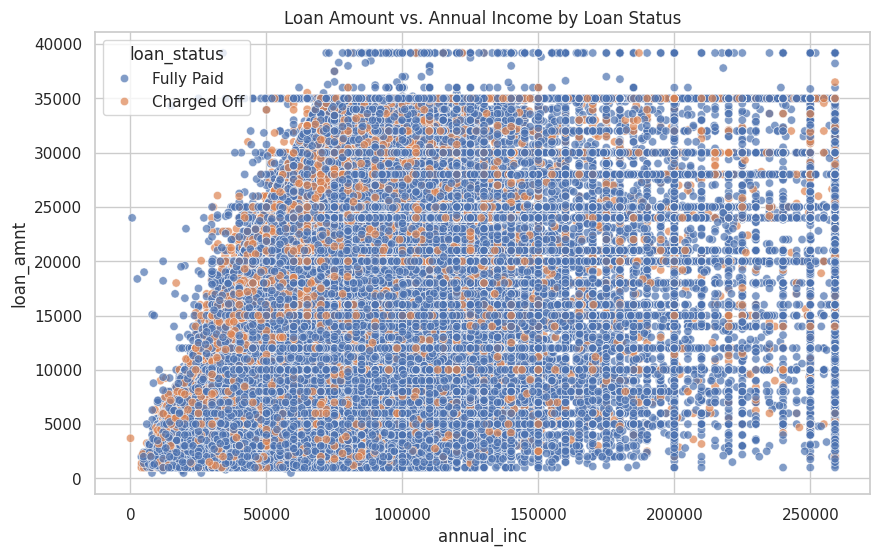

In [18]:
# Scatter plot of annual income vs. loan amount with loan status as hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='annual_inc', y='loan_amnt', hue='loan_status', alpha=0.7)
plt.title("Loan Amount vs. Annual Income by Loan Status")
plt.show()


# Key Observation
The scatter plot indicates that charged-off loans are more prevalent in the income groups upto 100000 suggesting a higher risk of default within this range compared to larger loan amounts.


# Function Definitions for Binary Transformation
This section defines three functions to transform specific columns into binary or categorical values:
1. **pub_rec**: Converts the number of public records into binary; returns 0 if there are no records and 1 otherwise.
2. **mort_acc**: Transforms the mortgage accounts count into binary; returns 0 if there are no accounts, 1 if there is at least one account, or retains the original value if it's between 0 and 1.
3. **pub_rec_bankruptcies**: Similar to `mort_acc`, it converts the number of bankruptcies into binary; returns 0 for none, 1 for one or more, or retains the original value if it's less than 1.


In [19]:
def pub_rec(number):
  if number == 0.0:
    return 0
  else:
    return 1

def mort_acc(number):
  if number == 0.0:
    return 0
  elif number >= 1.0:
    return 1
  else:
    return number

def pub_rec_bankruptcies(number):
  if number == 0.0:
    return 0
  elif number >= 1.0:
    return 1
  else:
    return number

In [20]:
data['pub_rec'] = data.pub_rec.apply(pub_rec)
data['mort_acc'] = data.mort_acc.apply(mort_acc)
data['pub_rec_bankruptcies'] = data.mort_acc.apply(pub_rec_bankruptcies)

In [ ]:
sns.set(style="whitegrid")


plt.subplot(6, 2, 1)
sns.countplot(x='pub_rec', data=df, hue='loan_status')
plt.subplot(6, 2, 2)
sns.countplot(x='initial_list_status', data=df, hue='loan_status')
plt.subplot(6, 2, 3)
sns.countplot(x='application_type', data=df, hue='loan_status')
plt.subplot(6, 2, 4)
sns.countplot(x='mort_acc', data=df, hue='loan_status')
plt.subplot(6, 2, 5)
sns.countplot(x='pub_rec_bankruptcies', data=df, hue='loan_status')
plt.show()

## Extracting and Converting Loan Term

Extract numeric values from the 'term' column by splitting on space and selecting the numeric part, then convert the extracted values to integers for consistent data type.


In [22]:
df['term'].value_counts()

,count
term,
36 months,302005
60 months,94025


In [23]:
# Extract numeric values from the 'term' column and convert to integer
df['term'] = df['term'].str.split(' ').str[1].astype(int)
print(df['term'].value_counts())


term
36    302005
60     94025
Name: count, dtype: int64


## Mapping Verification Status to Numeric Codes

Convert 'verification_status' categories into numeric values to streamline analysis.


In [24]:
df['verification_status'].value_counts()

,count
verification_status,
Verified,139563
Source Verified,131385
Not Verified,125082


In [25]:
# Replace values in verification_status with new numeric equivalents
df['verification_status'] = df['verification_status'].map({
    'Not Verified': 0,
    'Verified': 1,
    'Source Verified': 2
})

# Check the conversion
print(df['verification_status'].value_counts())


verification_status
1    139563
2    131385
0    125082
Name: count, dtype: int64


## Converting Employment Length to Numeric Values

Map employment length categories to numeric values for easier analysis and modeling.


In [26]:
df['emp_length'].value_counts()

,count
emp_length,
10+ years,144342
2 years,35827
< 1 year,31725
3 years,31665
5 years,26495
1 year,25882
4 years,23952
6 years,20841
7 years,20819


In [27]:
emp_length_mapping = {
    '10+ years': 10,
    '9 years': 9,
    '8 years': 8,
    '7 years': 7,
    '6 years': 6,
    '5 years': 5,
    '4 years': 4,
    '3 years': 3,
    '2 years': 2,
    '1 year': 1,
    '< 1 year': 0
}

df['emp_length'] = df['emp_length'].map(emp_length_mapping)


## Encoding Loan Status as Numeric

Convert loan status categories into binary numeric values, where 'Fully Paid' is 0 and 'Charged Off' is 1.


In [28]:
df['loan_status'] = data.loan_status.map({'Fully Paid':0, 'Charged Off':1})

## Removing Dollar Sign from Purpose Column

Remove any dollar sign symbols (`$`) from entries in the 'purpose' column to clean the data.


In [29]:
df['purpose'] = df['purpose'].str.replace('$', '', regex=False)

## Calculate Credit History Length and Drop Original Date Column

Calculate the length of credit history in years based on a reference date (e.g., January 1, 2024) and store it in a new column, `credit_history_length`. Then, remove the original `earliest_cr_line` column.


In [30]:
reference_date = datetime(2024, 1, 1)

# Calculate credit history length in years and create a new column
df['credit_history_length'] = (reference_date - df['earliest_cr_line']).dt.days / 365

# Drop the original column
df.drop(columns=['earliest_cr_line'], inplace=True)

## Display Correlation Heatmap for Numerical Features

Visualize the correlations among numerical features in the dataset to understand their relationships and identify potential multicollinearity.


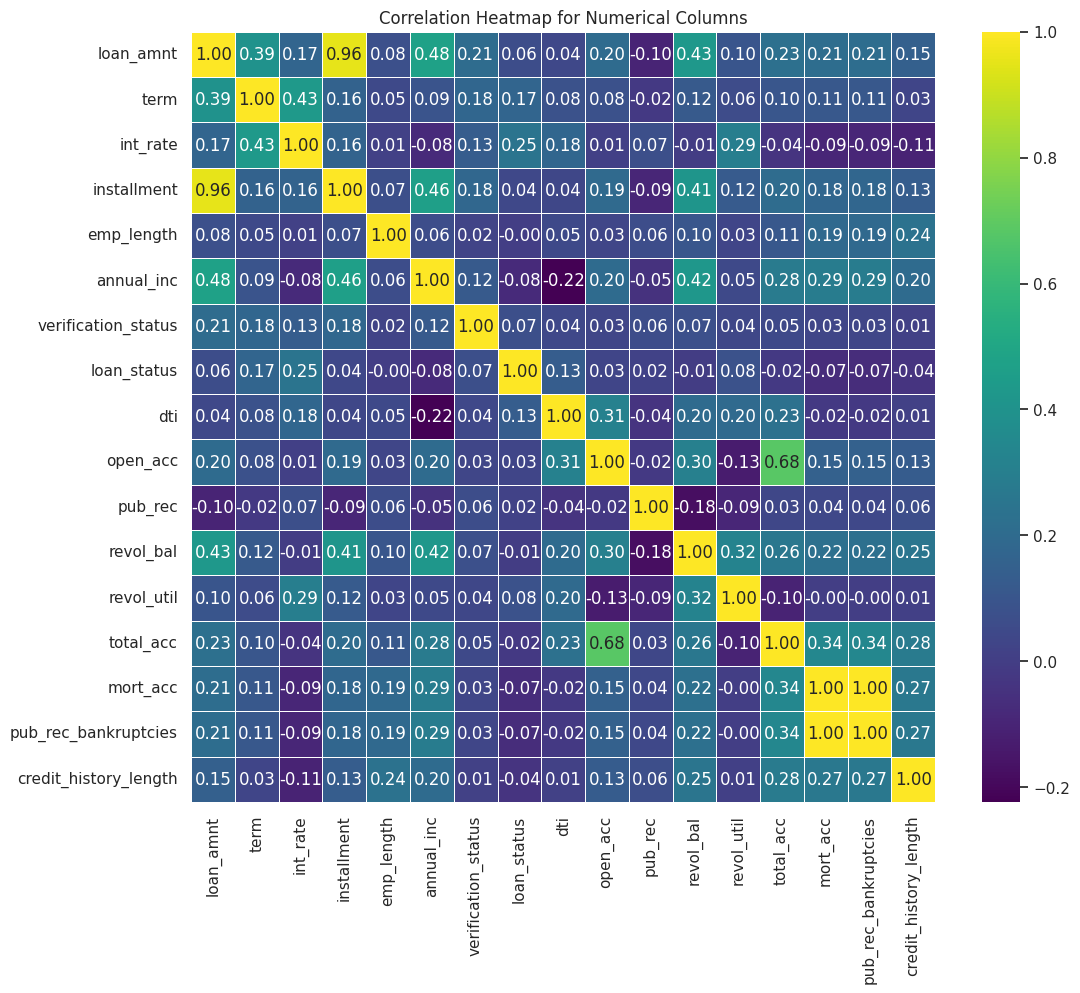

In [31]:
sns.set(style="whitegrid")

# Generate the correlation matrix for numerical columns only
numeric_corr = df.select_dtypes(include=['float64', 'int']).corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Plot heatmap
sns.heatmap(numeric_corr, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap for Numerical Columns")
plt.show()

## Summary of Highly Correlated Variables

The analysis reveals several pairs of variables with high correlation:

- **Installment and Loan Amount**: A strong relationship indicates that higher loan amounts correspond to higher monthly installments.
- **Open Accounts and Total Accounts**: This suggests that as the number of open accounts increases, the total accounts also rise.
- **Installment and Revolving Balance**: This correlation indicates that larger installment payments are associated with higher revolving balances.
- **Total Accounts and Open Accounts**: Reflects a similar trend where an increase in open accounts corresponds to a higher total account count.
- **Mortgage Accounts and Public Record Bankruptcies**: A significant correlation suggests that borrowers with more mortgage accounts may have a higher incidence of public bankruptcies.

These relationships highlight potential multicollinearity issues and the need for careful feature selection in further analyses.


In [32]:
df[['home_ownership', 'grade', 'sub_grade', 'purpose', 'title', 'application_type']]

,home_ownership,grade,sub_grade,purpose,title,application_type
0,RENT,B,B4,vacation,vacation,INDIVIDUAL
1,MORTGAGE,B,B5,debt consolidation,debt consolidation,INDIVIDUAL
2,RENT,B,B3,credit card refinancing,credit card refinancing,INDIVIDUAL
3,RENT,A,A2,credit card refinancing,credit card refinancing,INDIVIDUAL
4,MORTGAGE,C,C5,credit card refinance,credit card refinance,INDIVIDUAL
...,...,...,...,...,...,...
396025,RENT,B,B4,debt consolidation,debt consolidation,INDIVIDUAL
396026,MORTGAGE,C,C1,debt consolidation,debt consolidation,INDIVIDUAL
396027,RENT,B,B1,pay off credit cards,pay off credit cards,INDIVIDUAL
396028,MORTGAGE,C,C2,loanforpayoff,loanforpayoff,INDIVIDUAL


In [33]:
df['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,198348
RENT,159790
OWN,37746
OTHER,112
NONE,31
ANY,3


In [34]:
df['grade'].value_counts()

,count
grade,
B,116018
C,105987
A,64187
D,63524
E,31488
F,11772
G,3054


In [35]:
df['application_type'].value_counts()

,count
application_type,
INDIVIDUAL,395319
JOINT,425
DIRECT_PAY,286


In [36]:
df['grade'].value_counts()

,count
grade,
B,116018
C,105987
A,64187
D,63524
E,31488
F,11772
G,3054


In [37]:
df['initial_list_status'].value_counts()

,count
initial_list_status,
f,238066
w,157964


## Categorization of Loan Purposes

A function categorizes loan purposes based on keywords into the following categories:

- **Credit Card Consolidation**
- **Home Improvement**
- **Vehicle Purchase**
- **Moving and Relocation**
- **Personal Loan**
- **Business Financing**
- **Special Events**
- **Travel**
- **Debt Consolidation**
- **Medical Reasons**

Any unmatched purposes are labeled as "Others." The updated DataFrame reflects these categorizations, showing the frequency of each category.


In [38]:
# Function to categorize purposes based on keywords
def categorize_purpose(purpose):
    purpose = purpose.lower()  # Convert to lowercase for consistency

    # Define categories and their keywords
    categories = {
        'Credit Card Consolidation': ['credit card', 'cc', 'credit consolidation', 'credit card debt'],
        'Home Improvement': ['home improvement', 'home', 'house', 'renovation', 'remodeling', 'repairs'],
        'Vehicle Purchase': ['vehicle', 'car', 'bike', 'automobile', 'motorcycle', 'transport'],
        'Moving and Relocation': ['moving and relocation', 'moving', 'relocation', 'shifting', 'transfer', 'migration'],
        'Personal Loan': ['personal', 'individual', 'consumer', 'private'],
        'Business Financing': ['business', 'commercial', 'enterprise', 'startup', 'business loan'],
        'Special Events': ['wedding', 'marriage', 'celebration', 'event', 'party'],
        'Travel': ['vacation', 'travel', 'trip', 'holiday', 'journey', 'excursion'],
        'Debt Consolidation': ['debt', 'loan', 'consolidation', 'credit consolidation', 'finance', 'debt management', 'financial management', 'credit counseling'],
        'Medical Reasons' : ['medical bills', 'medicine', 'hospital', 'doctor']

    }

    # Categorize based on keywords
    for category, keywords in categories.items():
        if any(keyword in purpose for keyword in keywords):
            return category

    return 'Others'

# Apply the categorization function to the purpose column
df['purpose'] = df['purpose'].apply(categorize_purpose)

# Display the updated DataFrame and value counts
print(df['purpose'].value_counts())


purpose
Debt Consolidation           212850
Credit Card Consolidation     75755
Others                        59218
Home Improvement              23901
Vehicle Purchase               7102
Personal Loan                  5178
Business Financing             4761
Moving and Relocation          2718
Travel                         2444
Special Events                 1952
Medical Reasons                 151
Name: count, dtype: int64


## One-Hot Encoding of Categorical Variables

The categorical columns have been transformed into binary format for better data representation.

### Preview of the Encoded DataFrame

```python
df.head()


In [39]:
# One-hot encode the categorical columns
df = pd.get_dummies(df, columns=['application_type', 'home_ownership', 'grade', 'initial_list_status', 'purpose'], drop_first=False)

# Display the first few rows of the encoded dataframe

df.head()


,loan_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,annual_inc,verification_status,issue_d,loan_status,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,address,credit_history_length,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,initial_list_status_f,initial_list_status_w,purpose_Business Financing,purpose_Credit Card Consolidation,purpose_Debt Consolidation,purpose_Home Improvement,purpose_Medical Reasons,purpose_Moving and Relocation,purpose_Others,purpose_Personal Loan,purpose_Special Events,purpose_Travel,purpose_Vehicle Purchase
0,10000.0,36,11.44,329.48,B4,Marketing,10,117000.0,0,2015-01-01,0,vacation,26.24,16.0,0,36369.0,41.8,25.0,0,0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",33.608219,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
1,8000.0,36,11.99,265.68,B5,Credit analyst,4,65000.0,0,2015-01-01,0,debt consolidation,22.05,17.0,0,20131.0,53.3,27.0,1,1,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",19.515068,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False
2,15600.0,36,10.49,506.97,B3,Statistician,0,43057.0,2,2015-01-01,0,credit card refinancing,12.79,13.0,0,11987.0,92.2,26.0,0,0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",16.430137,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False
3,7200.0,36,6.49,220.65,A2,Client Advocate,6,54000.0,0,2014-11-01,0,credit card refinancing,2.60,6.0,0,5472.0,21.5,13.0,0,0,"823 Reid Ford\r\nDelacruzside, MA 00813",17.345205,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False
4,24375.0,60,17.27,609.33,C5,Destiny Management Inc.,9,55000.0,1,2013-04-01,1,credit card refinance,33.95,13.0,0,24584.0,69.8,43.0,1,1,"679 Luna Roads\r\nGreggshire, VA 11650",24.854795,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False


## Conversion of Boolean Columns to Integer Format

Boolean columns in the DataFrame have been converted to integer values (0s and 1s) for more efficient processing.

In [40]:
# Convert only boolean columns to integers (0s and 1s)
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)



In [41]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,annual_inc,verification_status,issue_d,loan_status,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,address,credit_history_length,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,initial_list_status_f,initial_list_status_w,purpose_Business Financing,purpose_Credit Card Consolidation,purpose_Debt Consolidation,purpose_Home Improvement,purpose_Medical Reasons,purpose_Moving and Relocation,purpose_Others,purpose_Personal Loan,purpose_Special Events,purpose_Travel,purpose_Vehicle Purchase
0,10000.0,36,11.44,329.48,B4,Marketing,10,117000.0,0,2015-01-01,0,vacation,26.24,16.0,0,36369.0,41.8,25.0,0,0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",33.608219,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,B5,Credit analyst,4,65000.0,0,2015-01-01,0,debt consolidation,22.05,17.0,0,20131.0,53.3,27.0,1,1,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",19.515068,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,B3,Statistician,0,43057.0,2,2015-01-01,0,credit card refinancing,12.79,13.0,0,11987.0,92.2,26.0,0,0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",16.430137,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,A2,Client Advocate,6,54000.0,0,2014-11-01,0,credit card refinancing,2.60,6.0,0,5472.0,21.5,13.0,0,0,"823 Reid Ford\r\nDelacruzside, MA 00813",17.345205,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,C5,Destiny Management Inc.,9,55000.0,1,2013-04-01,1,credit card refinance,33.95,13.0,0,24584.0,69.8,43.0,1,1,"679 Luna Roads\r\nGreggshire, VA 11650",24.854795,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


## Dropping Unnecessary Columns

The following columns have been removed from the DataFrame as they are not essential for the analysis:

- **issue_d**: The date the loan was issued.
- **emp_title**: The job title of the borrower.
- **title**: The loan title.
- **address**: The borrower's address.
- **sub_grade**: A more granular grade classification of the loan.

In [42]:
df.drop(columns=['issue_d', 'emp_title', 'title', 'address', 'sub_grade'],
 axis=1, inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 46 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   loan_amnt                          396030 non-null  float64
 1   term                               396030 non-null  int64  
 2   int_rate                           396030 non-null  float64
 3   installment                        396030 non-null  float64
 4   emp_length                         396030 non-null  int64  
 5   annual_inc                         396030 non-null  float64
 6   verification_status                396030 non-null  int64  
 7   loan_status                        396030 non-null  int64  
 8   dti                                396030 non-null  float64
 9   open_acc                           396030 non-null  float64
 10  pub_rec                            396030 non-null  int64  
 11  revol_bal                          3960

## Defining Feature and Target Variables

The feature set **X** is created by excluding the target variable **loan_status** from the DataFrame, while the target variable **y** is defined as the **loan_status** column.

In [44]:
# Define X and y
X = df.drop(columns=['loan_status'])  # Drop the target variable from X
y = df['loan_status']  # Set the target variable

## Splitting Data into Training and Testing Sets

The dataset is divided into training and testing sets, with 80% allocated for training and 20% for testing. The split maintains the proportion of the target variable through stratification.

In [45]:
# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (316824, 45)
Shape of X_test: (79206, 45)
Shape of y_train: (316824,)
Shape of y_test: (79206,)


## Scaling the Data

The features in the training and testing datasets are scaled using Min-Max Scaling, which transforms the values to a range between 0 and 1. This step is essential for algorithms sensitive to feature scaling.



In [46]:
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data (using the same scaler fitted on X_train)
X_test_scaled = scaler.transform(X_test)

# Optional: Convert back to DataFrame for easier inspection
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316824 entries, 213913 to 123699
Data columns (total 45 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   loan_amnt                          316824 non-null  float64
 1   term                               316824 non-null  int64  
 2   int_rate                           316824 non-null  float64
 3   installment                        316824 non-null  float64
 4   emp_length                         316824 non-null  int64  
 5   annual_inc                         316824 non-null  float64
 6   verification_status                316824 non-null  int64  
 7   dti                                316824 non-null  float64
 8   open_acc                           316824 non-null  float64
 9   pub_rec                            316824 non-null  int64  
 10  revol_bal                          316824 non-null  float64
 11  revol_util                         3168

## Logistic Regression Model Initialization and Training

A Logistic Regression model is initialized with a specified random state and maximum iterations. The model is then trained using the scaled training data to predict the target variable.

In [48]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)
# Train the model on the scaled training data
logreg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

## Model Predictions and Evaluation

Predictions are made on the test data using the trained Logistic Regression model. The model's performance is evaluated through accuracy and a detailed classification report, which includes precision, recall, and F1-score metrics.

In [49]:
# Make predictions on the test data
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8064
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89     63671
           1       0.56      0.06      0.11     15535

    accuracy                           0.81     79206
   macro avg       0.69      0.52      0.50     79206
weighted avg       0.76      0.81      0.74     79206



## Model Evaluation Results

The Logistic Regression model achieved an accuracy of **80.64%** on the test data.
### Summary

- The model has a good precision for the majority class (0), but its recall for the minority class (1) is low, indicating potential issues with class imbalance.
- The weighted averages suggest that while the overall accuracy is reasonable, the performance on the minority class needs improvement.


## Confusion Matrix



In [50]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[62926   745]
 [14593   942]]



### Summary

- **True Negatives (TN)**: 63056 (Predicted 0 and actual 0)
- **False Positives (FP)**: 615 (Predicted 1 and actual 0)
- **False Negatives (FN)**: 14536 (Predicted 0 and actual 1)
- **True Positives (TP)**: 999 (Predicted 1 and actual 1)

This confusion matrix highlights that while the model correctly identifies a large number of non-default loans (0s), it struggles to accurately predict default loans (1s), as seen in the high number of false negatives.


## ROC Curve and AUC Visualization


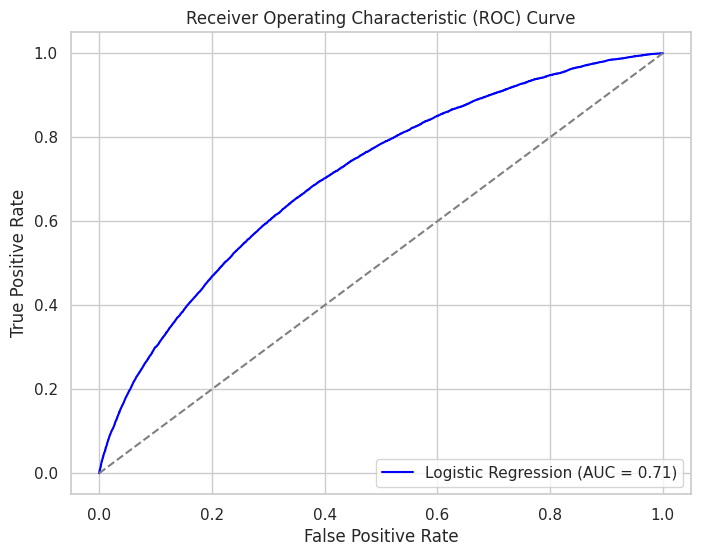

In [51]:
# Predict probabilities for the positive class (class 1)
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plotting the ROC-AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The model shows strong performance in predicting fully paid loans but struggles with charged-off loans. The AUC of 0.71 indicates moderate discriminatory ability.







## Variance Inflation Factor (VIF) Calculation

This function calculates the Variance Inflation Factor (VIF) for each feature in the dataset to assess multicollinearity.

In [52]:
# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# # Calculate VIF
# vif_results = calculate_vif(X_train_resampled)

# # Display the VIF results
# print(vif_results)

In [53]:
# Start with a copy of your scaled DataFrame
X_train_reduced = X_train_scaled.copy()

# Iteratively drop features with high VIF
while True:
    # Calculate VIF for the current set of features
    vif_data = calculate_vif(X_train_reduced)
    max_vif = vif_data['VIF'].max()

    # Stop if all VIFs are below the threshold (e.g., 10)
    if max_vif < 10:
        break

    # Identify feature with the highest VIF
    feature_to_drop = vif_data.loc[vif_data['VIF'] == max_vif, 'Feature'].values[0]
    print(f"Dropping '{feature_to_drop}' with VIF: {max_vif}")

    # Drop the feature
    X_train_reduced = X_train_reduced.drop(columns=[feature_to_drop])

# Display the final VIF results
print("Final VIF Results:")
print(calculate_vif(X_train_reduced))


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping 'mort_acc' with VIF: inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping 'application_type_DIRECT_PAY' with VIF: inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping 'home_ownership_ANY' with VIF: inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping 'grade_A' with VIF: inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping 'initial_list_status_f' with VIF: inf
Dropping 'purpose_Debt Consolidation' with VIF: 85976.56987883798
Dropping 'application_type_INDIVIDUAL' with VIF: 1432.0442397943361
Dropping 'loan_amnt' with VIF: 233.5000190515181
Dropping 'int_rate' with VIF: 52.96576747534868
Dropping 'home_ownership_MORTGAGE' with VIF: 18.186528895788005
Dropping 'open_acc' with VIF: 12.508274257690877
Final VIF Results:
                              Feature       VIF
0                                term  1.836260
1                         installment  5.689777
2                          emp_length  4.020781
3                          annual_inc  6.834443
4                 verification_status  2.761302
5                                 dti  6.852651
6                             pub_rec  1.284015
7                           revol_bal  3.642577
8                          revol_util  7.483333
9                           total_acc  7.036506
10               pub_rec_bankruptcies  4.426929
11            

In [54]:
X_test_reduced = X_test[X_train_reduced.columns]


# Feature Selection Using VIF

This section focuses on reducing multicollinearity in the dataset by identifying and removing features with high VIF values. The process involves:

- Starting with a copy of the dataset.
- Iteratively checking for features that contribute to multicollinearity.
- Dropping those features until all remaining features are within acceptable limits.

The goal is to simplify the model while maintaining its predictive power.


In [57]:
# Start with a copy of your scaled DataFrame
X_train_reduced_1 = X.copy()

# Iteratively drop features with high VIF
while True:
    # Calculate VIF for the current set of features
    # Exclude 'loan_amnt' from VIF calculation
    vif_data = calculate_vif(X_train_reduced_1.drop(columns=['loan_amnt']))
    max_vif = vif_data['VIF'].max()

    # Stop if all VIFs are below the threshold (e.g., 10)
    if max_vif < 10:  # Consider using 10 or 5 as a more standard threshold
        break

    # Identify feature with the highest VIF
    feature_to_drop = vif_data.loc[vif_data['VIF'] == max_vif, 'Feature'].values[0]

    print(f"Dropping '{feature_to_drop}' with VIF: {max_vif}")

    # Drop the feature, unless it's 'loan_amnt'
    if feature_to_drop != 'loan_amnt':
        X_train_reduced_1 = X_train_reduced_1.drop(columns=[feature_to_drop])
    else:
        print(f"Skipped dropping '{feature_to_drop}' due to preset conditions.")

# Display the final VIF results
print("Final VIF Results:")
print(calculate_vif(X_train_reduced_1))


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping 'mort_acc' with VIF: inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping 'application_type_DIRECT_PAY' with VIF: inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping 'home_ownership_ANY' with VIF: inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping 'grade_A' with VIF: inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping 'initial_list_status_f' with VIF: inf
Dropping 'purpose_Debt Consolidation' with VIF: 71762.82019015231
Dropping 'application_type_INDIVIDUAL' with VIF: 1381.7413304632157
Dropping 'int_rate' with VIF: 122.61570905661104
Dropping 'home_ownership_MORTGAGE' with VIF: 29.701333560792857
Dropping 'term' with VIF: 18.328164702065003
Dropping 'credit_history_length' with VIF: 13.228371061468081
Dropping 'open_acc' with VIF: 12.661476886454262
Final VIF Results:
                              Feature        VIF
0                           loan_amnt  49.537280
1                         installment  48.344497
2                          emp_length   3.781667
3                          annual_inc   6.869708
4                 verification_status   2.751677
5                                 dti   6.902864
6                             pub_rec   1.271615
7                           revol_bal   3.627581
8                          revol_util   7.410774
9                           total_acc   7

In [59]:
y_reduced_1=y.copy()

## Cross-Validation for Logistic Regression Model

This section demonstrates how to perform cross-validation on a logistic regression model using the scaled feature set.

In [60]:
X_train_reduced_1 = scaler.fit_transform(X_train_reduced_1)

# Set up K-Fold cross-validation
kfold = KFold(n_splits=5)

# Calculate the mean cross-validation accuracy
accuracy = np.mean(cross_val_score(logreg, X_train_reduced_1, y_reduced_1, cv=kfold, scoring='accuracy'))

# Print the cross-validation accuracy
print("Cross Validation accuracy: {:.3f}".format(accuracy))

Cross Validation accuracy: 0.805


## Cross-Validation Results

The logistic regression model achieved a cross-validation accuracy of **0.805**.

### Interpretation

This accuracy indicates that the model performs consistently across different subsets of the data, suggesting a good generalization ability. It confirms the model's robustness in predicting loan status based on the features provided.

In [61]:
y_reduced_1.value_counts()

,count
loan_status,
0,318357
1,77673


# Train-Test Split After Feature Reduction

In this step, the reduced feature set is split into training and testing datasets. The split is performed to evaluate model performance on unseen data. The dataset is divided as follows:

- **Training Set**: Used to train the model.
- **Testing Set**: Used to validate the model's performance.

The split maintains the class distribution using stratification, ensuring that both sets represent the original data distribution adequately.


In [62]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train_reduced_1, y_reduced_1, test_size=0.2, random_state=42, stratify=y)


# Applying SMOTE for Class Imbalance

To address class imbalance in the training data, the Synthetic Minority Over-sampling Technique (SMOTE) is applied. This method generates synthetic samples for the minority class, enhancing the training dataset and helping improve model performance. The resampled dataset is defined as follows:

- **X_train_resampled**: The feature set with synthetic samples added.
- **y_train_resampled**: The target variable corresponding to the resampled feature set.


In [64]:
sm = SMOTE(random_state=42)
X_train_resampled, y_train_ressampled = sm.fit_resample(X_train1, y_train1)


# Logistic Regression Model Training and Evaluation

A Logistic Regression model is trained on the resampled dataset to improve classification performance. After fitting the model, predictions are made on the test set. The classification report provides an overview of the model's performance, including precision, recall, and F1-score for each class. This evaluation helps to understand how well the model distinguishes between the classes.



In [66]:
lr1 = LogisticRegression(max_iter=1000)
lr1.fit(X_train_resampled, y_train_ressampled)
predictions = lr1.predict(X_test1)

# Classification Report
print(classification_report(y_test1, predictions))

              precision    recall  f1-score   support

           0       0.89      0.64      0.74     63671
           1       0.31      0.66      0.42     15535

    accuracy                           0.65     79206
   macro avg       0.60      0.65      0.58     79206
weighted avg       0.77      0.65      0.68     79206



## Model Evaluation Results

The Logistic Regression model's performance on the test set is summarized below:

- **Precision**: The model has a precision of 0.89 for class 0 and 0.31 for class 1, indicating that when it predicts class 1, it is correct only 31% of the time.
- **Recall**: The recall for class 0 is 0.64, and for class 1, it is 0.66. This shows that the model correctly identifies 66% of the actual instances of class 1.
- **F1-score**: The F1-score, which balances precision and recall, is 0.74 for class 0 and 0.42 for class 1.
- **Overall Accuracy**: The model achieves an accuracy of 0.65 across all predictions.

## Comparision between test and train data

In [69]:
lr2 = LogisticRegression(max_iter=1000)
# Train the Logistic Regression model on the training data
lr2.fit(X_train_resampled, y_train_ressampled)

# Make predictions on both training and testing data
y_train_pred = lr2.predict(X_train_resampled)
y_test_pred = lr2.predict(X_test1)

# Calculate metrics for training data
train_accuracy = accuracy_score(y_train_ressampled, y_train_pred)
train_classification_report = classification_report(y_train_ressampled, y_train_pred)

# Calculate metrics for testing data
test_accuracy = accuracy_score(y_test1, y_test_pred)
test_classification_report = classification_report(y_test1, y_test_pred)

# Display the results
print("Training Accuracy: {:.4f}".format(train_accuracy))
print("Training Classification Report:\n", train_classification_report)

print("Testing Accuracy: {:.4f}".format(test_accuracy))
print("Testing Classification Report:\n", test_classification_report)


Training Accuracy: 0.6570
Training Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.64      0.65    254686
           1       0.65      0.67      0.66    254686

    accuracy                           0.66    509372
   macro avg       0.66      0.66      0.66    509372
weighted avg       0.66      0.66      0.66    509372

Testing Accuracy: 0.6455
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.64      0.74     63671
           1       0.31      0.66      0.42     15535

    accuracy                           0.65     79206
   macro avg       0.60      0.65      0.58     79206
weighted avg       0.77      0.65      0.68     79206



In [82]:
X_train1.shape

(316824, 33)

In [83]:
X_test1.shape

(79206, 33)

In [84]:
y_train1.shape

(316824,)

In [85]:
y_test1.shape

(79206,)

## Logistic Regression with Class Weights

In this section, we implement a Logistic Regression model using class weights to address class imbalance in the training data.


In [86]:
class_labels = np.unique(y)  # Get unique class labels
class_weights = compute_class_weight('balanced', classes=class_labels, y=y_train1)
class_weight_dict = dict(zip(class_labels, class_weights))  # Convert to dictionary

# Initialize the Logistic Regression model with class weights
lr3 = LogisticRegression(class_weight=class_weight_dict, random_state=42, max_iter=1000)

# Train the model on the training data
lr3.fit(X_train1, y_train1)

# Make predictions on the test data using the correct model
y_pred = lr3.predict(X_test1)  # Use lr3 here instead of logreg

# Evaluate the model
accuracy = accuracy_score(y_test1, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test1, y_pred))

Accuracy: 0.6406
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.63      0.74     63671
           1       0.31      0.67      0.42     15535

    accuracy                           0.64     79206
   macro avg       0.60      0.65      0.58     79206
weighted avg       0.77      0.64      0.68     79206



### Interpretation
The model shows good precision for class 0, indicating that when it predicts class 0, it is mostly correct. However, the precision for class 1 is low, suggesting that the model struggles to predict the positive class accurately. The recall for class 1 is relatively better, indicating it captures a decent portion of the actual positives. This highlights the challenge of handling class imbalance, where the model can favor the majority class while achieving reasonable performance on the minority class.

## Precision-Recall Curve Plot

The function `precision_recall_curve_plot` is designed to visualize the trade-off between precision and recall at various threshold values. This helps in assessing the performance of the model in distinguishing between the positive and negative classes.

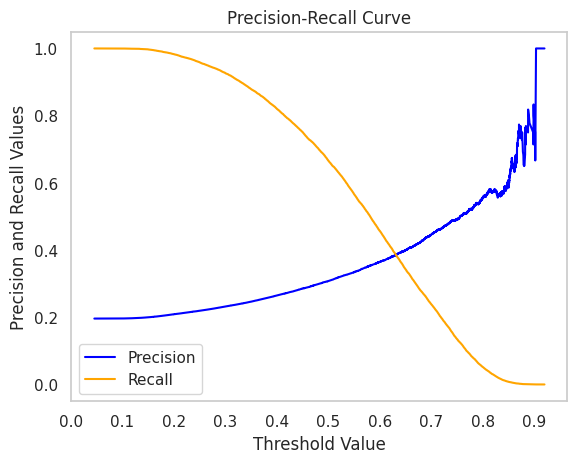

In [89]:
def precision_recall_curve_plot(y_test, pred_proba):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)

    # Define the threshold boundary for the plot
    threshold_boundary = thresholds.shape[0]

    # Plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='-', color='blue', label='Precision')

    # Plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], linestyle='-', color='orange', label='Recall')

    # Set the x-axis limits
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    # Labels and title
    plt.xlabel('Threshold Value')
    plt.ylabel('Precision and Recall Values')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid()
    plt.show()

# Call the function with your test labels and predicted probabilities
precision_recall_curve_plot(y_test1, lr3.predict_proba(X_test1)[:, 1])


## Summary of Model Performance with Threshold Adjustment

The precision-recall analysis indicates that the optimal threshold for classification is set at **0.65**. This threshold provides a balance between precision and recall, crucial for effectively distinguishing between the positive and negative classes in your model.

# Enhancing Default Detection and Minimizing False Positives in Loan Approvals

### Ensuring Accurate Detection of Real Defaulters

To accurately detect true defaulters while minimizing false positives, our model requires a balanced approach that prioritizes **high recall** for the defaulter class. This ensures that most defaulters are correctly identified, allowing the bank to avoid high-risk loans effectively. Here’s how we can enhance our model to achieve this:

- **Adjust the Decision Threshold**: By lowering the threshold, we can capture more potential defaulters, increasing recall for this class. The threshold of **0.65** from the precision-recall curve can help maintain a balance, capturing real defaulters while keeping false positives controlled.
  
- **Utilize Cost-sensitive Learning**: Applying class weights or using techniques like SMOTE, as seen in our case study, can help the model focus on the minority defaulter class, improving the model’s sensitivity toward defaulters without excessively raising false positives.

- **Model Selection and Tuning**: Regularly tuning hyperparameters and experimenting with different models (such as ensemble methods) can help improve the detection of defaulters while minimizing false positives, ensuring an optimal trade-off between precision and recall.

### Balancing Detection with Industry Constraints on NPA

The Non-Performing Asset (NPA) issue emphasizes the importance of avoiding risky loans, which aligns with the model's focus on identifying defaulters accurately. In light of this, the following strategies can be incorporated:

- **Setting a Conservative Threshold**: With NPAs being a critical concern, a more conservative threshold might be appropriate, even at the cost of some false positives. This approach prioritizes safety by restricting loan disbursals to high-risk individuals, preventing potential NPAs.

- **Implementing Additional Screening**: Beyond the model predictions, implementing a manual or rule-based review process for borderline cases can add another layer of protection. For instance, applicants with a probability close to the threshold can undergo additional checks before loan disbursement, further reducing the chances of granting loans to likely defaulters.

## Actionable Insights & Recommendations

- **Adjust Model Threshold**  
  Lower the threshold below 0.65 to reduce false positives, allowing more creditworthy applicants to qualify.

- **Cost-sensitive Modeling**  
  Implement custom metrics with a higher penalty for false negatives to reduce NPAs while limiting lost loan opportunities.

- **Refine Feature Selection**  
  Focus on predictive features of defaulters, adjusting inputs to improve model accuracy on high-risk profiles.

- **Cross-validation for Robustness**  
  Use cross-validation to ensure consistent performance across samples, reducing overfitting.

- **Explore Ensemble Methods**  
  Consider methods like Random Forest to capture complex patterns and improve predictive power.

- **Regular Performance Monitoring**  
  Continuously update and retrain with real data to adapt to evolving trends in repayment and defaults.

- **Tiered Approval Strategy**  
  Offer smaller loans or adjust interest rates for high-risk applicants to minimize NPAs while keeping loans accessible.
